Data Visualizations for my master playlist: 'everything'


Will use this data to help decide what type of machine learning model to build

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import nbformat
from IPython.display import display
import seaborn as sns
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('raw_data.csv')


Group the data by 'Artist Name' and count the number of songs per artist

In [2]:
songs_per_artist = df['Artist Name'].value_counts()

Create a bar chart for the top 20 artists

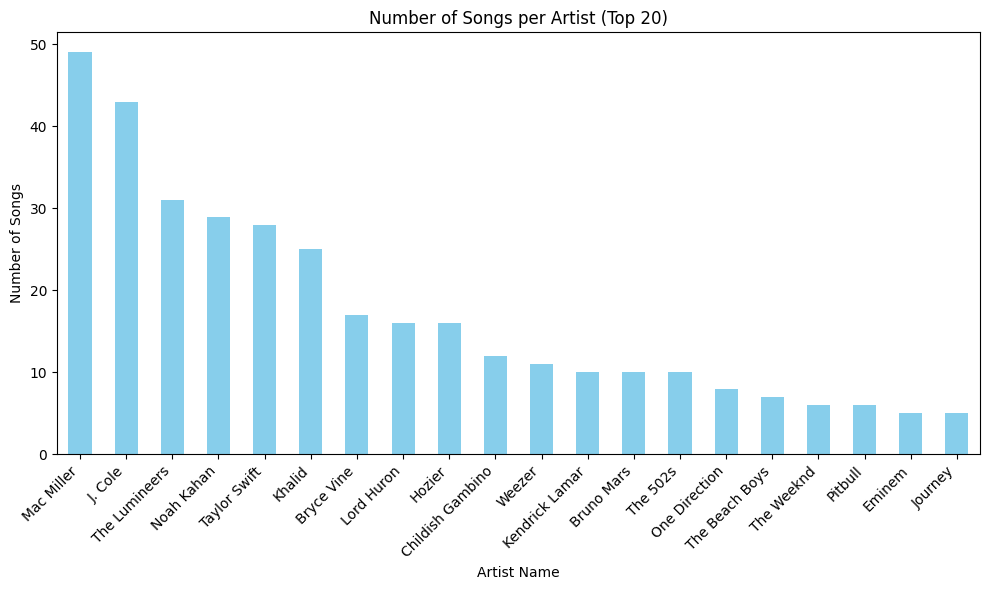

In [3]:
top_20_artists = songs_per_artist.head(20)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
top_20_artists.plot(kind='bar', color='skyblue')
plt.xlabel('Artist Name')
plt.ylabel('Number of Songs')
plt.title('Number of Songs per Artist (Top 20)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

Scatterplot for Popularity

In [4]:
pop_fig = go.Figure()


pop_fig.add_trace(go.Scatter(
    x=df['Popularity'],
    y=df.index,
    mode='markers',
    marker=dict(color='skyblue', size=10),
    text=df['Track Name'],
    hovertemplate='Song: %{text}<br>Popularity: %{x}<extra></extra>',
))

pop_fig.update_layout(
    title='Popularity of Albums that Songs are From',
    xaxis_title='Popularity',
    yaxis_title='Song Index',
    xaxis=dict(tickangle=-45, tickfont=dict(size=10)),
)

pop_fig.show()

The popularity of the album. The value will be between 0 and 100, with 100 being the most popular.

In [5]:
accousticness_fig = go.Figure()

accousticness_fig.add_trace(go.Scatter(
    x=df['Acousticness'],
    y=df.index,
    mode='markers',
    marker=dict(color='skyblue', size=10),
    text=df['Track Name'],
    hovertemplate='Song: %{text}<br>Accousticness: %{x}<extra></extra>',
))

accousticness_fig.update_layout(
    title='Acousticness',
    xaxis_title='',
    yaxis_title='Song Index',
    xaxis=dict(tickangle=-45, tickfont=dict(size=10)),
)

accousticness_fig.show()

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

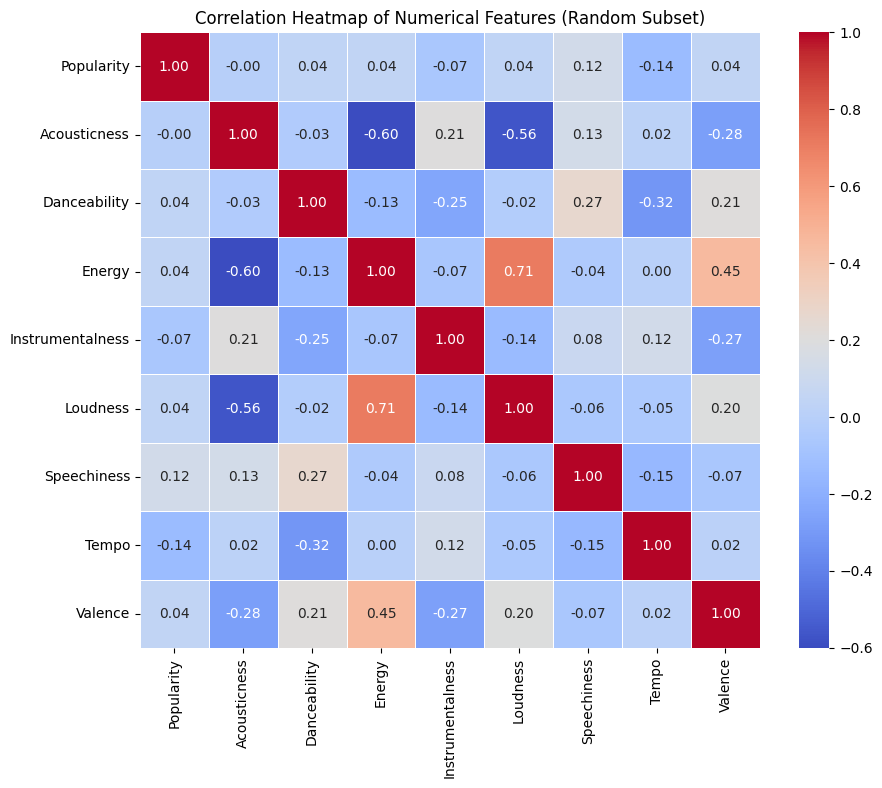

In [6]:
random_subset = df.sample(n=100, random_state=42)  # Set random_state for reproducibility

numerical_features = random_subset[['Popularity', 'Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Loudness', 'Speechiness', 'Tempo', 'Valence']]

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features (Random Subset)')
plt.show()